In [1]:
import numpy as np
import pandas as pd
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
training_file_path = r'D:\image\train-images-idx3-ubyte'
training_labels_file_path = r'D:\image\train-labels-idx1-ubyte'
testing_file_path = r'D:\image\t10k-images-idx3-ubyte'
testing_labels_file_path = r'D:\image\t10k-labels-idx1-ubyte'

In [3]:
X_train, y_train = loadlocal_mnist(training_file_path, training_labels_file_path)
X_test, y_test = loadlocal_mnist(testing_file_path, testing_labels_file_path)

In [4]:
print(np.shape(X_train))
print(np.shape(X_test))

(60000, 784)
(10000, 784)


In [5]:
# Reshaping the images to 28 x 28 
# Since the images are grayscale therefore we specify number of channels as 1
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28,28,1)

In [6]:
X_train.shape

(60000, 28, 28, 1)

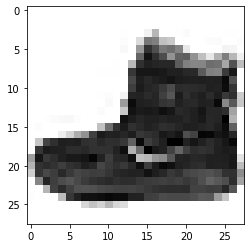

In [7]:
# Plotting a sample from the dataset
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

In [8]:
# normalizing the data 
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
cnn_model = Sequential()
# The convolution layers for feature extraction
cnn_model.add(Conv2D(filters= 32, kernel_size = (3,3), activation='relu',input_shape = (28,28,1)))
# Using MaxPooling to reduce the computaion time by choosing the highest pixel density from the 2x2 matrix
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 64, kernel_size= (3,3),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 64, kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
# Flattening the data to provide it as input for the Dense layer
cnn_model.add(Flatten())
# Building the final classification layer
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10,activation='softmax'))

In [10]:
# Compiling the model 
# Using sparse crossentropy since we are not applying one hot encoding 
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model = cnn_model.fit(X_train,y_train,epochs = 20,validation_split=0.15)

Epoch 1/20
1594/1594 [==============================] - 42s 26ms/step - loss: 0.2070 - accuracy: 0.9221 - val_loss: 0.3142 - val_accuracy: 0.8903
Epoch 2/20
1594/1594 [==============================] - 38s 24ms/step - loss: 0.1969 - accuracy: 0.9251 - val_loss: 0.3119 - val_accuracy: 0.8919
Epoch 3/20
1594/1594 [==============================] - 38s 24ms/step - loss: 0.1871 - accuracy: 0.9287 - val_loss: 0.3460 - val_accuracy: 0.8878
Epoch 4/20
1594/1594 [==============================] - 50s 31ms/step - loss: 0.1786 - accuracy: 0.9318 - val_loss: 0.3545 - val_accuracy: 0.8882
Epoch 5/20
1594/1594 [==============================] - 43s 27ms/step - loss: 0.1684 - accuracy: 0.9360 - val_loss: 0.3464 - val_accuracy: 0.8903
Epoch 6/20
1594/1594 [==============================] - 39s 24ms/step - loss: 0.1633 - accuracy: 0.9382 - val_loss: 0.3712 - val_accuracy: 0.8904
Epoch 7/20
1594/1594 [==============================] - 49s 31ms/step - loss: 0.1608 - accuracy: 0.9385 - val_loss: 0.3606 -

In [14]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.5078 - accuracy: 0.8899


[0.507775068283081, 0.8899000287055969]